In [1]:
# COMP 5300 Final Project
# Musculoskeletal Abnormality Detection
# Michelle, Jennifer, Amelia, Deva

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
%matplotlib inline
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
# Display file directory tree
def print_file_directory(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 3 * level
        subindent = ' ' * 3 * (level + 1)
        print('{}{}/'.format(indent, os.path.basename(root)))
        for f in files:
            print('{}{}'.format(subindent, f))

In [4]:
print_file_directory('MURA-v1.1')

MURA-v1.1/
   train_labeled_studies.csv
   valid_image_paths.csv
   valid_labeled_studies.csv
   train_image_paths.csv
   valid/
      XR_HAND/
         patient11599/
            study1_negative/
               image1.png
               image2.png
         patient11304/
            study1_positive/
               image1.png
               image2.png
               image3.png
         patient11552/
            study1_negative/
               image1.png
               image2.png
               image3.png
         patient11555/
            study1_negative/
               image1.png
               image2.png
               image3.png
         patient11597/
            study1_negative/
               image1.png
               image2.png
         patient11563/
            study1_negative/
               image1.png
               image2.png
               image3.png
         patient11564/
            study1_negative/
               image1.png
               image2.png
               image3.pn

In [5]:
# Remove .DS_Store if needed
# ! find . -name '.DS_Store' -type f -delete

In [6]:
# Images stored and separated in folders by upper extremity study type
os.listdir('MURA-v1.1/train')

['XR_HAND',
 'XR_HUMERUS',
 'XR_FINGER',
 'XR_ELBOW',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_FOREARM']

In [7]:
os.listdir('MURA-v1.1/valid')

['XR_HAND',
 'XR_HUMERUS',
 'XR_FINGER',
 'XR_ELBOW',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_FOREARM']

In [8]:
# Restructure and consolidate data with image paths and labels
# Example path: MURA-v1.1/train/XR_HAND/patient05509/study1_negative/image1.png

def restructure_dataset(path):
    data = []
    
    for study_type in os.listdir(path):
        # Get study type path to access patient folders
        study_type_path = path + '/' + str(study_type)

        for patient_id in os.listdir(study_type_path):
            
            # Get patient id path to access study folders
            study_id = study_type_path + '/' + str(patient_id)
            for label in os.listdir(study_id):
                # Get abnormality label as positive (1) or negative (0)
                if label.split('_')[-1] == 'positive': 
                    num_label = 1
                elif label.split('_')[-1] == 'negative':
                    num_label= 0

                # Get study id and label path to access image folders
                label_path = study_id + '/' + str(label)
                for img in os.listdir(label_path):
                    img_path = label_path + '/' + str(img)

                    # Add data to array
                    data.append(
                        {
                            'study_type': study_type,
                            'patient_id': patient_id,
                            'img_path': img_path,
                            'label': num_label,
                        }
                    )
    return data

In [9]:
# Consolidate all training data into single dataframe 
df_train = pd.DataFrame(restructure_dataset('MURA-v1.1/train'))
df_train.head()

study_type    patient_id                                           img_path  \
0    XR_HAND  patient05509  MURA-v1.1/train/XR_HAND/patient05509/study1_ne...   
1    XR_HAND  patient05509  MURA-v1.1/train/XR_HAND/patient05509/study1_ne...   
2    XR_HAND  patient05509  MURA-v1.1/train/XR_HAND/patient05509/study1_ne...   
3    XR_HAND  patient11109  MURA-v1.1/train/XR_HAND/patient11109/study1_ne...   
4    XR_HAND  patient11109  MURA-v1.1/train/XR_HAND/patient11109/study1_ne...   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [10]:
df_train.shape

(36810, 4)

In [34]:
df_train.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

In [11]:
# Preprocessing & stratified sampling to get validation dataset

df_train['combined_study_type_label'] = df_train['study_type'] + '_' + str(df_train['label'])

df_train, df_valid = train_test_split(df_train, test_size = 0.1, stratify = df_train['combined_study_type_label'])

df_train = df_train.drop(columns=['combined_study_type_label'])
df_valid = df_valid.drop(columns=['combined_study_type_label'])

In [12]:
df_train.head()

study_type    patient_id  \
11842    XR_FINGER  patient04657   
21759  XR_SHOULDER  patient01939   
27390     XR_WRIST  patient07587   
12783     XR_ELBOW  patient05814   
18286  XR_SHOULDER  patient02235   

                                                img_path  label  
11842  MURA-v1.1/train/XR_FINGER/patient04657/study1_...      0  
21759  MURA-v1.1/train/XR_SHOULDER/patient01939/study...      0  
27390  MURA-v1.1/train/XR_WRIST/patient07587/study1_n...      0  
12783  MURA-v1.1/train/XR_ELBOW/patient05814/study1_n...      0  
18286  MURA-v1.1/train/XR_SHOULDER/patient02235/study...      0

In [13]:
df_train.shape

(33129, 4)

In [14]:
df_valid.head()

study_type    patient_id  \
31461     XR_WRIST  patient08539   
5170       XR_HAND  patient10894   
23791  XR_SHOULDER  patient00722   
22267  XR_SHOULDER  patient02209   
8356     XR_FINGER  patient04141   

                                                img_path  label  
31461  MURA-v1.1/train/XR_WRIST/patient08539/study1_n...      0  
5170   MURA-v1.1/train/XR_HAND/patient10894/study1_ne...      0  
23791  MURA-v1.1/train/XR_SHOULDER/patient00722/study...      1  
22267  MURA-v1.1/train/XR_SHOULDER/patient02209/study...      0  
8356   MURA-v1.1/train/XR_FINGER/patient04141/study1_...      0

In [15]:
df_valid.shape

(3681, 4)

In [16]:
# Consolidate all test data into single dataframe
df_test = pd.DataFrame(restructure_dataset('MURA-v1.1/valid'))
df_test.head()

study_type    patient_id                                           img_path  \
0    XR_HAND  patient11599  MURA-v1.1/valid/XR_HAND/patient11599/study1_ne...   
1    XR_HAND  patient11599  MURA-v1.1/valid/XR_HAND/patient11599/study1_ne...   
2    XR_HAND  patient11304  MURA-v1.1/valid/XR_HAND/patient11304/study1_po...   
3    XR_HAND  patient11304  MURA-v1.1/valid/XR_HAND/patient11304/study1_po...   
4    XR_HAND  patient11304  MURA-v1.1/valid/XR_HAND/patient11304/study1_po...   

   label  
0      0  
1      0  
2      1  
3      1  
4      1

In [17]:
df_test.shape

(3197, 4)

In [35]:
df_test.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

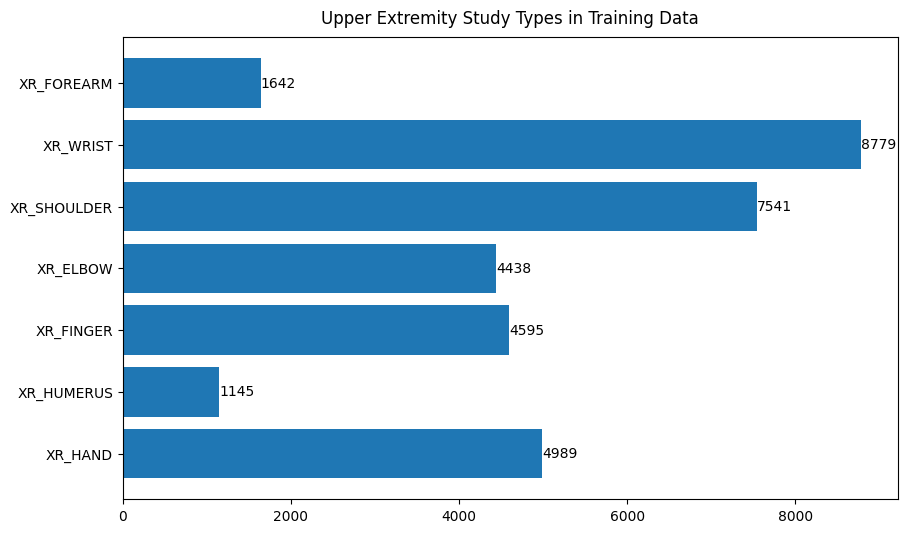

In [18]:
# Exploratory analysis
study_types = ['XR_HAND', 'XR_HUMERUS', 'XR_FINGER', 'XR_ELBOW', 'XR_SHOULDER', 'XR_WRIST', 'XR_FOREARM']

def print_type_values(df, title):
    study_counts = {}
    for study_type in study_types:
        study_counts[study_type] = (df.study_type == study_type).sum()
        
    fig, ax = plt.subplots(figsize = (10, 6))
    bars = ax.barh(list(study_counts.keys()), list(study_counts.values()))
    ax.bar_label(bars)
    plt.title(title, pad = 10)
    plt.show()

print_type_values(df_train, "Upper Extremity Study Types in Training Data")

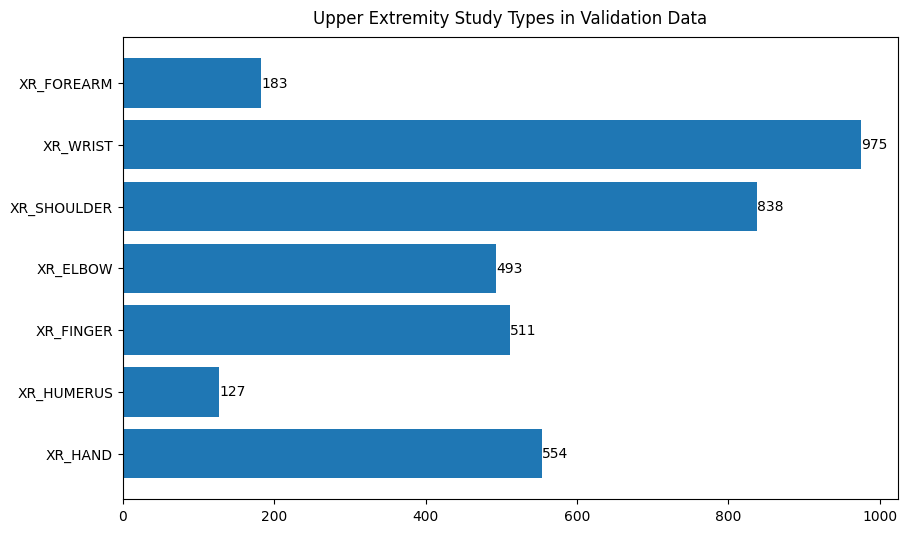

In [19]:
print_type_values(df_valid, "Upper Extremity Study Types in Validation Data")

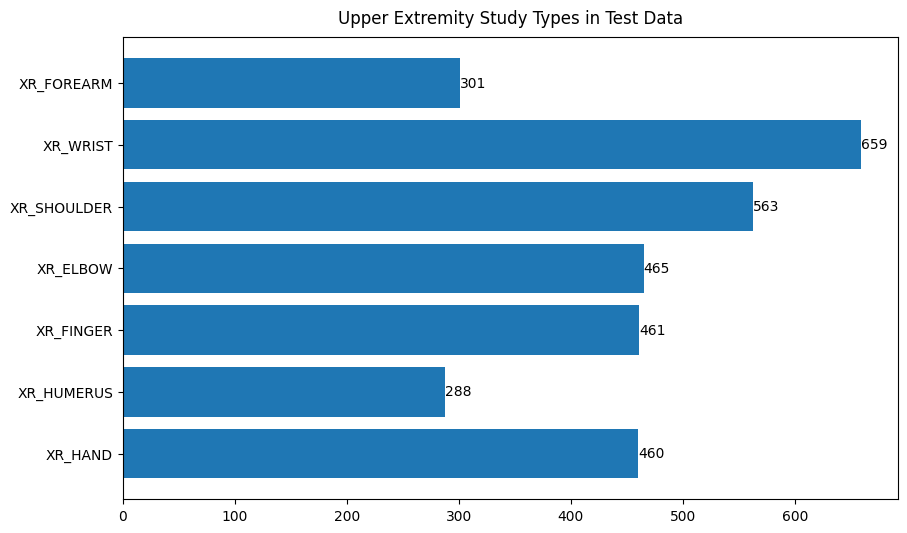

In [20]:
print_type_values(df_test, "Upper Extremity Study Types in Test Data")

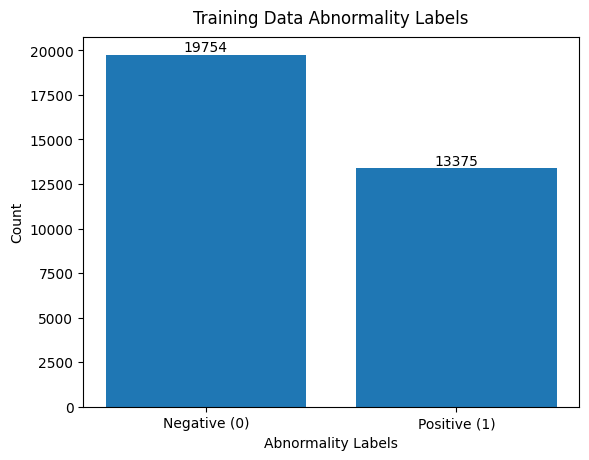

In [21]:
def print_labels(df, title):
    
    value_counts = df['label'].value_counts()
    
    bars = plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('Abnormality Labels')
    plt.ylabel('Count')
    plt.title(title, pad = 10)
    plt.xticks(value_counts.index, ['Negative (0)', 'Positive (1)'])
    for bar, count in zip(bars, value_counts.values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha = 'center', va = 'bottom')
    
    plt.show()

print_labels(df_train, "Training Data Abnormality Labels")

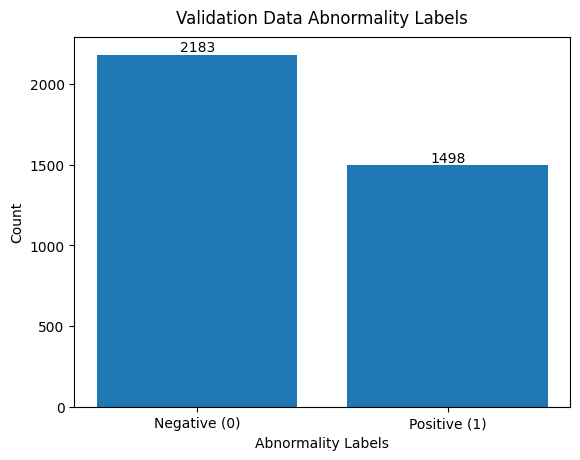

In [22]:
print_labels(df_valid, "Validation Data Abnormality Labels")

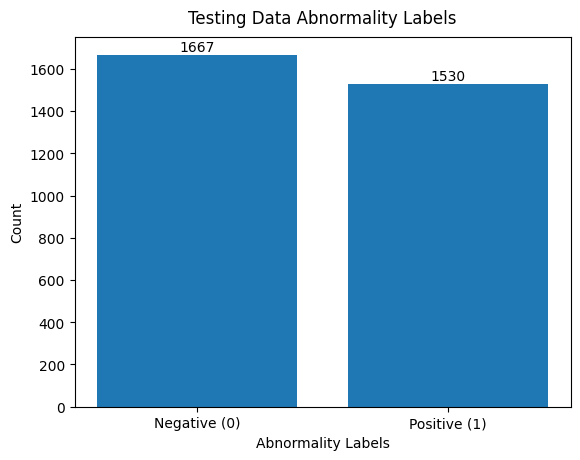

In [23]:
print_labels(df_test, "Testing Data Abnormality Labels")

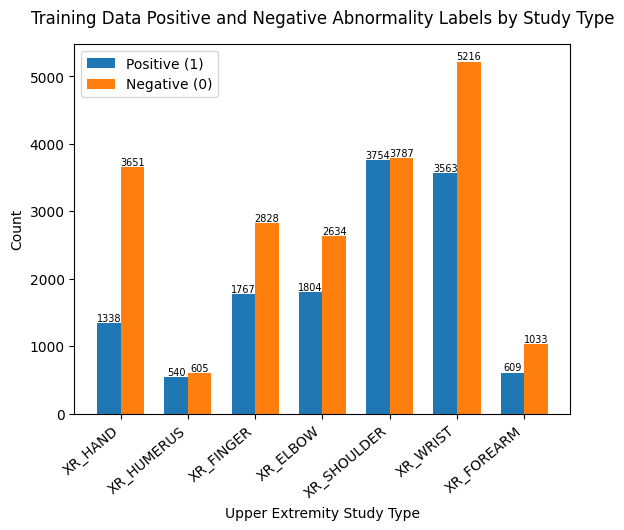

In [24]:
def print_labels_by_study_type(df, title):
    study_type_counts = []
    for study_type in study_types:
        positive_count = ((df.study_type == study_type) & (df.label == 1)).sum()
        negative_count = ((df.study_type == study_type) & (df.label == 0)).sum()
        study_type_counts.append((positive_count, negative_count))

    x = np.arange(len(study_types))
    width = 0.35
    
    fig, ax = plt.subplots()

    # Plot values
    positive_bars = ax.bar(x - width / 2, [count[0] for count in study_type_counts], width, label = 'Positive (1)')
    negative_bars = ax.bar(x + width / 2, [count[1] for count in study_type_counts], width, label = 'Negative (0)')
    ax.set_xlabel('Upper Extremity Study Type')
    ax.set_ylabel('Count')
    ax.set_title(title, pad = 15)
    ax.set_xticks(x)
    ax.set_xticklabels(study_types, rotation = 40, ha = 'right')
    ax.legend()
    
    for bar in positive_bars + negative_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha = 'center', va = 'bottom', fontsize = 7)
    
    plt.show()

print_labels_by_study_type(df_train, "Training Data Positive and Negative Abnormality Labels by Study Type")

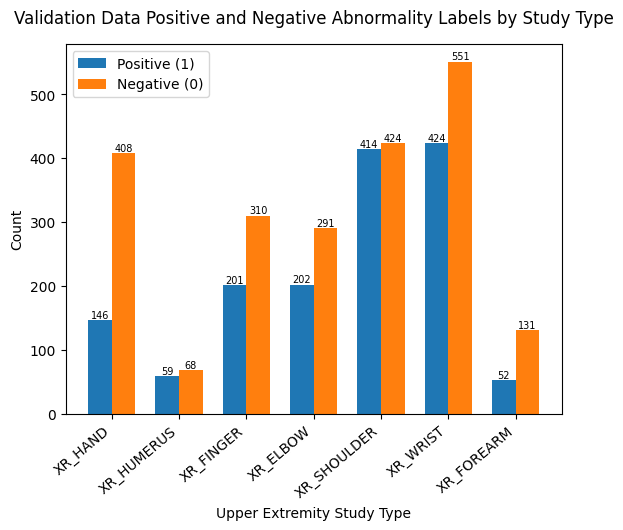

In [25]:
print_labels_by_study_type(df_valid, "Validation Data Positive and Negative Abnormality Labels by Study Type")

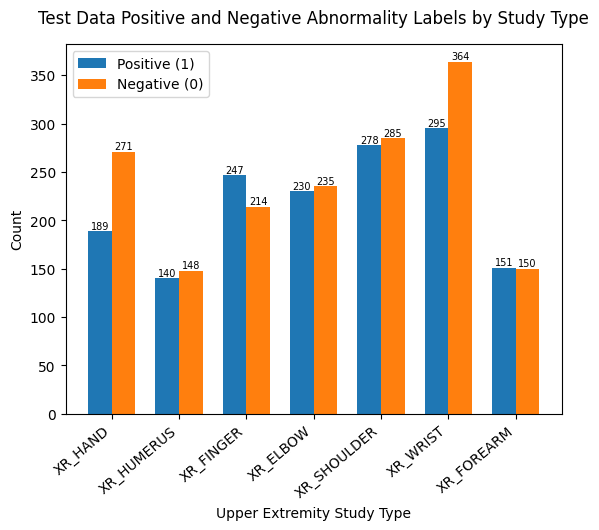

In [26]:
print_labels_by_study_type(df_test, "Test Data Positive and Negative Abnormality Labels by Study Type")

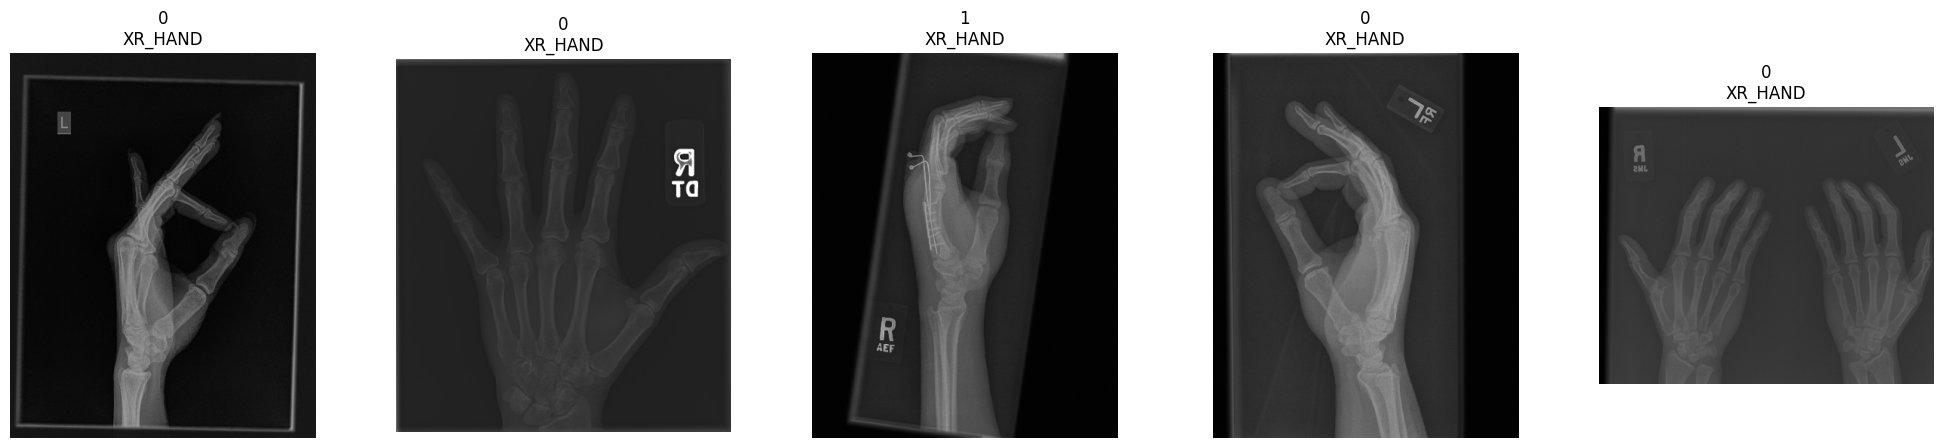

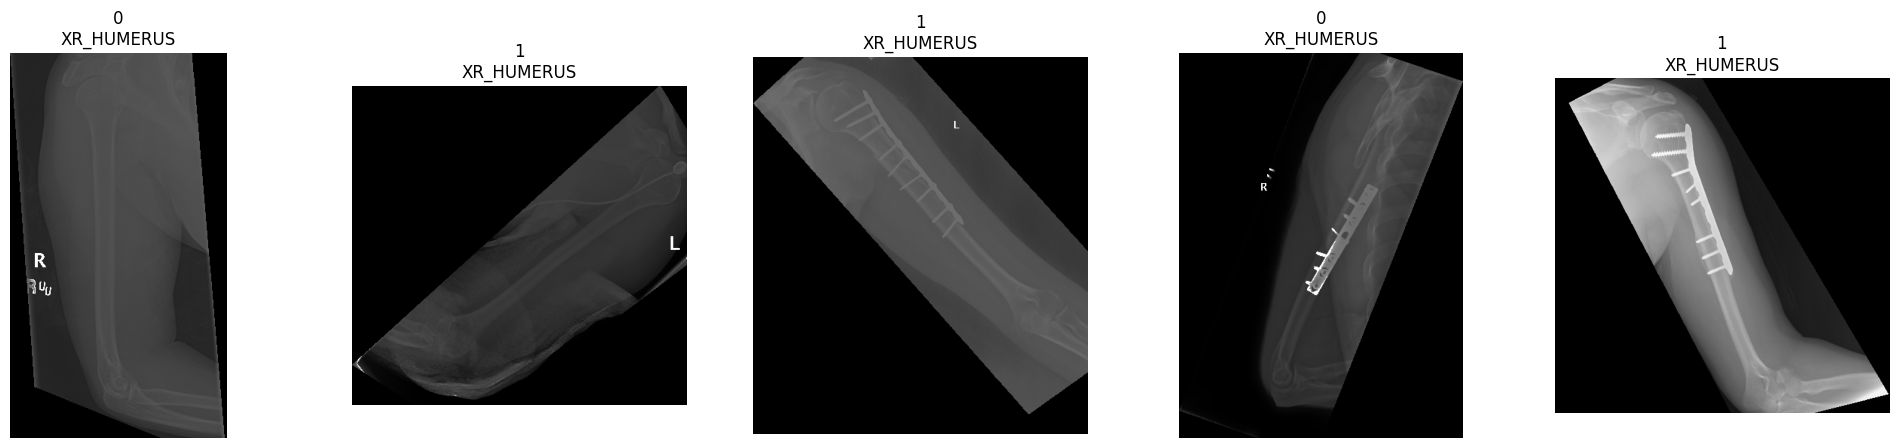

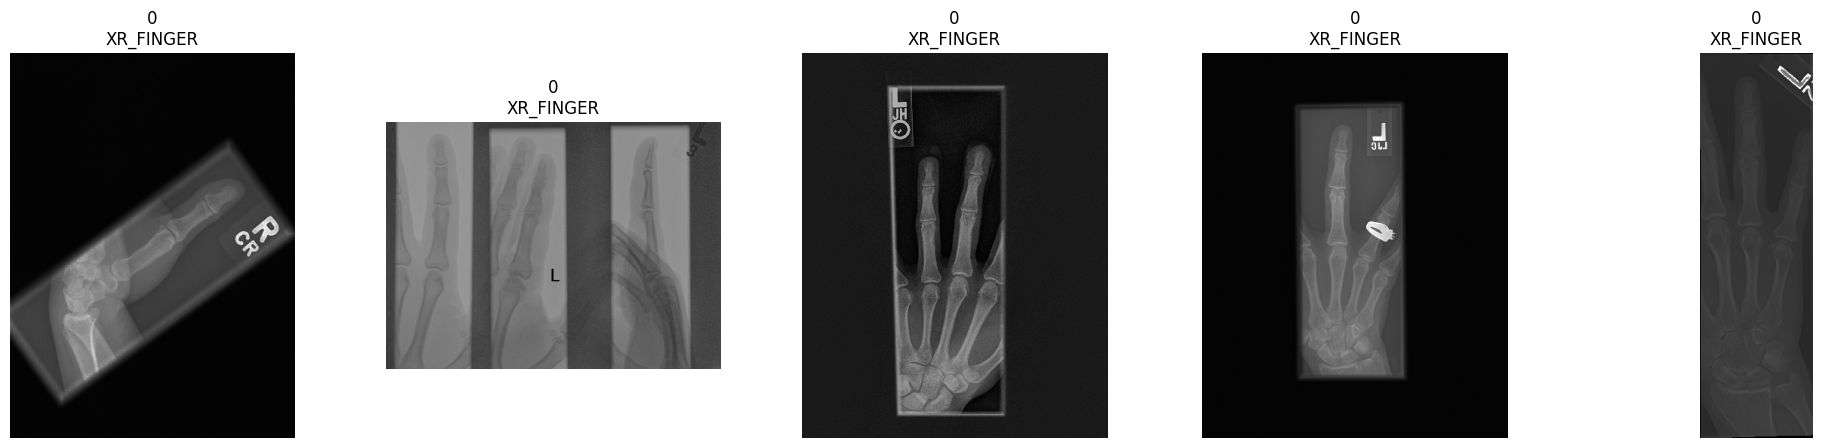

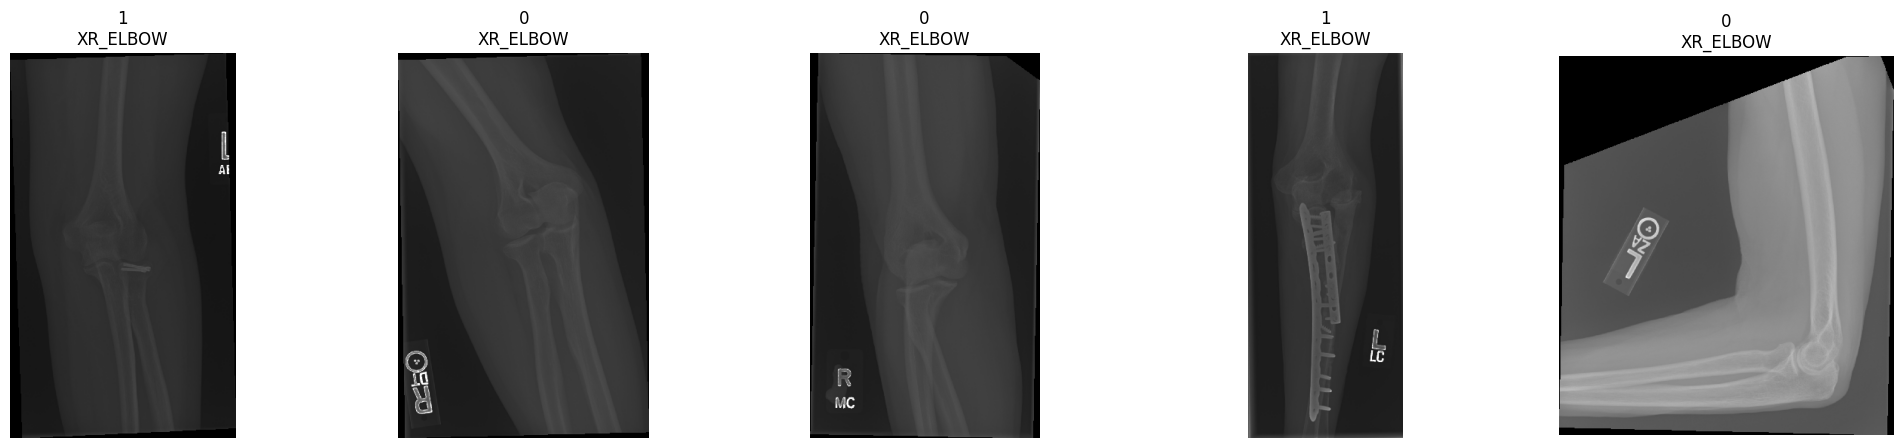

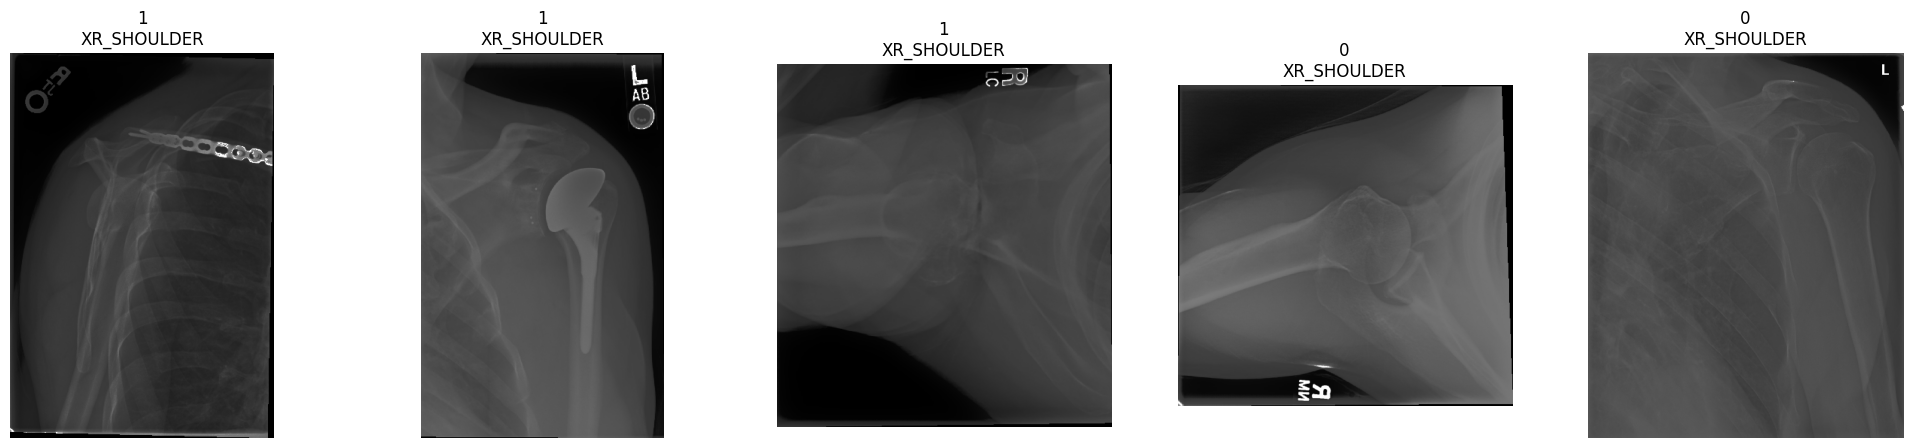

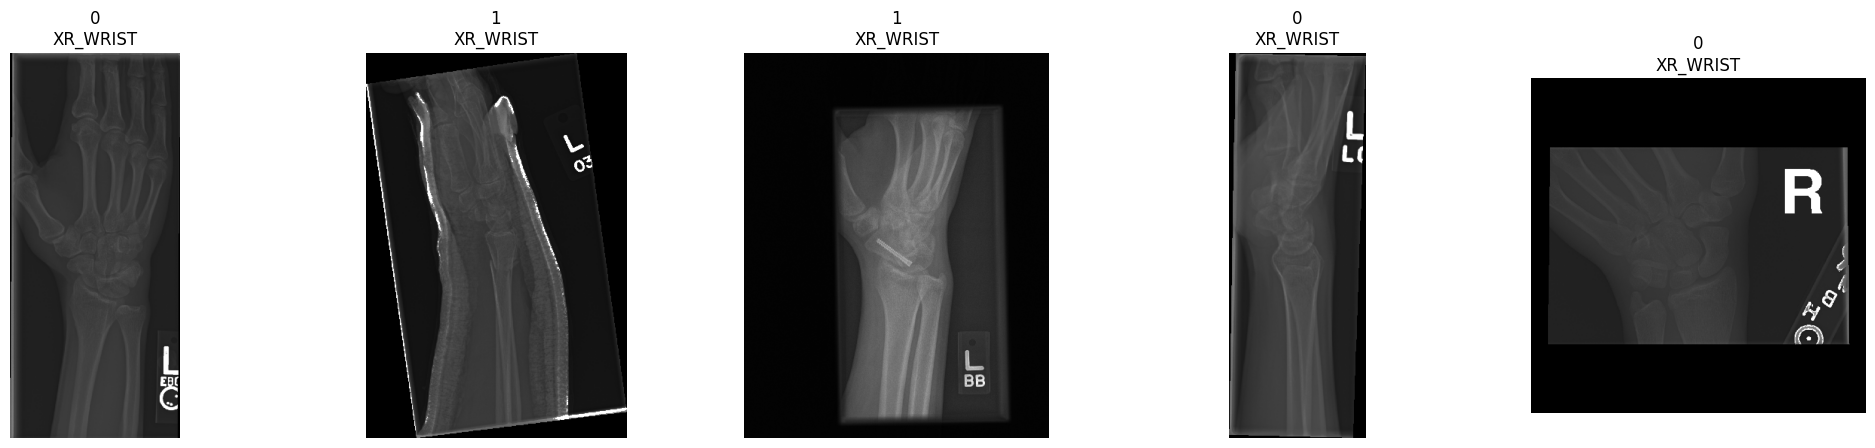

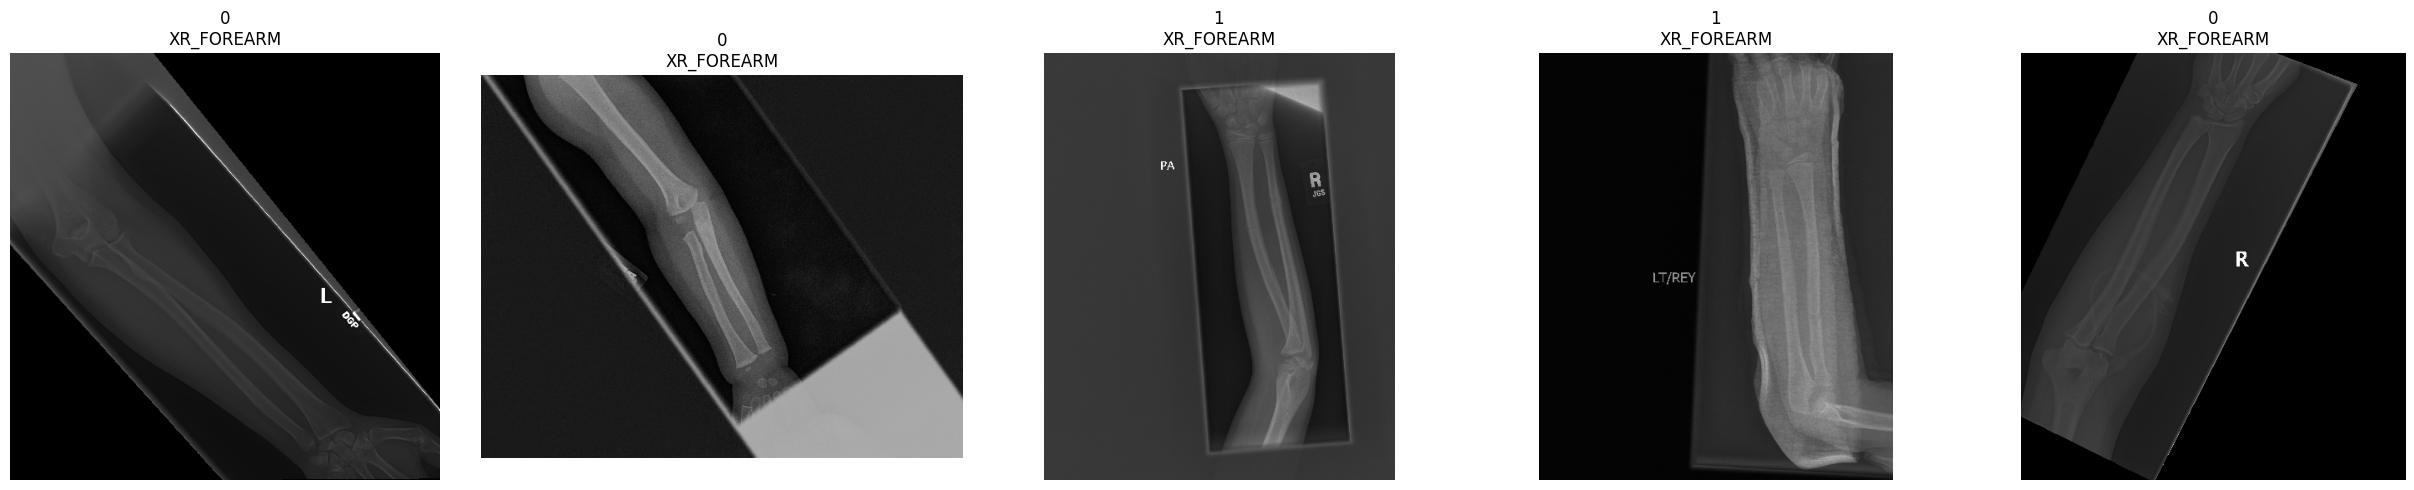

In [28]:
# Display sample of training images
for study_type in study_types:
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    imgs = df_train[df_train['study_type'] == study_type].sample(n = 5)
    for i, (image, label) in enumerate(zip(imgs['img_path'], imgs['label'])):
        image = load_img(image)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(label) + "\n" + study_type, fontsize=12)

plt.tight_layout()
plt.show()

In [29]:
# Convert labels to str
df_train['label'] = df_train['label'].replace({0: '0', 1: '1'})
df_valid['label'] = df_valid['label'].replace({0: '0', 1: '1'})
df_test['label'] = df_test['label'].replace({0: '0', 1: '1'})

In [30]:
# Data augmentation
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_dataframe(
    dataframe = df_train,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 33129 validated image filenames belonging to 2 classes.


In [31]:
valid_generator = datagen.flow_from_dataframe(
    dataframe = df_valid,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3681 validated image filenames belonging to 2 classes.


In [32]:
test_generator = datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3197 validated image filenames belonging to 2 classes.
